In [370]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [372]:
eq_df = pd.read_csv('earthquake_data.csv')

In [374]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [376]:
eq_df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [378]:
eq_df.drop(['title', 'date_time', 'magType', 'country', 'net', 'nst','continent'], axis=1, inplace= True)

In [380]:
eq_df.head()

,magnitude,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location
0,7.0,8,7,green,1,768,0.509,17.0,14.000,-9.7963,159.596,"Malango, Solomon Islands"
1,6.9,4,4,green,0,735,2.229,34.0,25.000,-4.9559,100.738,"Bengkulu, Indonesia"
2,7.0,3,3,green,1,755,3.125,18.0,579.000,-20.0508,-178.346,NaN
3,7.3,5,5,green,1,833,1.865,21.0,37.000,-19.2918,-172.129,"Neiafu, Tonga"
4,6.6,0,2,green,1,670,4.998,27.0,624.464,-25.5948,178.278,NaN


In [382]:
# Drop rows with any NaN values
eq_df = eq_df.dropna()

In [384]:
# Encode categorical data (Location, etc.) if necessary
label_encoder = LabelEncoder()
eq_df['location_encoded'] = label_encoder.fit_transform(eq_df['location'])

In [386]:
eq_df.head()

,magnitude,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,location_encoded
0,7.0,8,7,green,1,768,0.509,17.0,14.000,-9.7963,159.596,"Malango, Solomon Islands",128
1,6.9,4,4,green,0,735,2.229,34.0,25.000,-4.9559,100.738,"Bengkulu, Indonesia",28
3,7.3,5,5,green,1,833,1.865,21.0,37.000,-19.2918,-172.129,"Neiafu, Tonga",152
5,7.0,4,3,green,1,755,4.578,26.0,660.000,-26.0442,178.381,the Fiji Islands,244
6,6.8,1,3,green,1,711,4.678,22.0,630.379,-25.9678,178.363,the Fiji Islands,244


In [388]:
X = eq_df.drop(['alert','location'], axis=1)


In [390]:
y = eq_df['alert']

In [392]:
X.head()

,magnitude,cdi,mmi,tsunami,sig,dmin,gap,depth,latitude,longitude,location_encoded
0,7.0,8,7,1,768,0.509,17.0,14.000,-9.7963,159.596,128
1,6.9,4,4,0,735,2.229,34.0,25.000,-4.9559,100.738,28
3,7.3,5,5,1,833,1.865,21.0,37.000,-19.2918,-172.129,152
5,7.0,4,3,1,755,4.578,26.0,660.000,-26.0442,178.381,244
6,6.8,1,3,1,711,4.678,22.0,630.379,-25.9678,178.363,244


In [397]:
y.head()

0    green
1    green
3    green
5    green
6    green
Name: alert, dtype: object

## Naive Bayesian
The Naive Bayesian classifier is based on Bayes’ theorem with the independence assumptions between predictors. A Naive Bayesian model is easy to build, with no complicated iterative parameter estimation which makes it particularly useful for very large datasets. Despite its simplicity, the Naive Bayesian classifier often does surprisingly well and is widely used because it often outperforms more sophisticated classification methods. 	
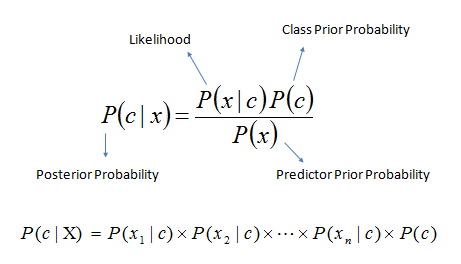

* c = Class label
* x = Input features
* P(c|x) = Posterior probability of the class given the input features
* P(x|c) = Likelihood
* P(c) = Prior probability of the class
* P(x) = Marginal probability (Probability of Evidence)
Algorithm		
Bayes theorem provides a way of calculating the posterior probability, P(c|x), from P(c), P(x), and P(x|c). Naive Bayes classifier assume that the effect of the value of a predictor (x) on a given class (c) is independent of the values of other predictors. This assumption is called class conditional independence.

In [400]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_nb}%")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8170731707317073%
Classification Report:
               precision    recall  f1-score   support

       green       0.95      0.89      0.92        64
      orange       0.25      0.33      0.29         3
         red       0.67      1.00      0.80         2
      yellow       0.47      0.54      0.50        13

    accuracy                           0.82        82
   macro avg       0.58      0.69      0.63        82
weighted avg       0.84      0.82      0.83        82

Confusion Matrix:
 [[57  1  0  6]
 [ 0  1  0  2]
 [ 0  0  2  0]
 [ 3  2  1  7]]


## KNN ALGORITHM

K Nearest Neighbors - Classification
K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique. 		
 		
Algorithm		
A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

Example  : Euclidean

In [403]:
# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Normalize the data (KNN is sensitive to scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune 'k' based on performance
knn.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 78.05%
Confusion Matrix:
 [[62  0  0  2]
 [ 1  0  0  2]
 [ 0  2  0  0]
 [10  1  0  2]]
Classification Report:
               precision    recall  f1-score   support

       green       0.85      0.97      0.91        64
      orange       0.00      0.00      0.00         3
         red       0.00      0.00      0.00         2
      yellow       0.33      0.15      0.21        13

    accuracy                           0.78        82
   macro avg       0.30      0.28      0.28        82
weighted avg       0.72      0.78      0.74        82



/Users/josephkambham/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/josephkambham/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/josephkambham/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

## 3. Decision Trees
It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy). Leaf node (e.g., Play) represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data
Entropy and Information Gain are fundamental concepts in decision trees and information theory. They are used to measure the uncertainty in a dataset and help in selecting the best features to split the data in a decision tree.

1. Entropy:
Entropy is a measure of uncertainty or impurity in a dataset. In the context of a decision tree, it helps quantify how mixed the data is in terms of class labels. If a dataset is pure (i.e., all samples belong to the same class), the entropy will be low (or zero). If the dataset contains a mix of different classes, the entropy will be higher.

Key Points:
Entropy = 0: All samples in the dataset belong to the same class (perfectly pure).
Entropy = 1: The dataset is equally split among different classes (maximum uncertainty).

2. Information Gain:
Information Gain (IG) is used to measure the effectiveness of a feature in classifying the dataset. It quantifies the reduction in entropy (uncertainty) after splitting the dataset based on a feature. In decision trees, we use Information Gain to select the best feature to split the data at each step. The feature with the highest information gain is chosen as the split.

Information Gain tells us how much entropy is reduced after splitting the data based on a particular feature.
A high information gain means the feature does a good job of separating the classes and reduces uncertainty the most.

In [408]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can tune hyperparameters later
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep_dt = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep_dt)

Accuracy: 81.30%
Confusion Matrix:
 [[82  4  0  7]
 [ 0  2  1  2]
 [ 0  0  4  0]
 [ 6  3  0 12]]
Classification Report:
               precision    recall  f1-score   support

       green       0.93      0.88      0.91        93
      orange       0.22      0.40      0.29         5
         red       0.80      1.00      0.89         4
      yellow       0.57      0.57      0.57        21

    accuracy                           0.81       123
   macro avg       0.63      0.71      0.66       123
weighted avg       0.84      0.81      0.82       123



In [410]:
# Random Forests
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier  = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune hyperparameters later
rf_classifier .fit(X_train, y_train)

#  Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 7: Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_rep_rf = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_rep_rf)

Accuracy: 89.02%
Confusion Matrix:
 [[62  1  0  1]
 [ 0  1  0  2]
 [ 0  0  2  0]
 [ 5  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

       green       0.93      0.97      0.95        64
      orange       0.50      0.33      0.40         3
         red       1.00      1.00      1.00         2
      yellow       0.73      0.62      0.67        13

    accuracy                           0.89        82
   macro avg       0.79      0.73      0.75        82
weighted avg       0.88      0.89      0.88        82



In [422]:
# Now, populate the accuracy dictionary with real scores
accuracy_dict = {
    'Algorithm': ['Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy Score': [accuracy_nb, accuracy_knn, accuracy_dt, accuracy_rf],
}

# Create the DataFrame
accuracy_df = pd.DataFrame(accuracy_dict)

# Display the DataFrame
print(accuracy_df)

       Algorithm  Accuracy Score
0    Naive Bayes        0.817073
1            KNN        0.780488
2  Decision Tree        0.813008
3  Random Forest        0.890244
